In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time
import datetime
import operator

In [10]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [11]:
confirmed=pd.read_csv('E:/covid_19_confirmed.csv')
recovered=pd.read_csv('E:/covid_19_recovered.csv')


In [12]:
deaths=pd.read_csv('E:/covid_19_deaths.csv')
deaths.reset_index(drop='True',inplace=True)


In [13]:
confirmed.shape

(266, 132)

In [14]:
recovered.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/2020',
       '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020', '1/27/2020',
       ...
       '5/19/2020', '5/20/2020', '5/21/2020', '5/22/2020', '5/23/2020',
       '5/24/2020', '5/25/2020', '5/26/2020', '5/27/2020', '5/28/2020'],
      dtype='object', length=132)

In [15]:
recovered.columns.size==deaths.columns.size

True

In [16]:
deaths.columns.size==confirmed.columns.size

True

In [17]:
recovered=recovered[recovered['Country/Region']=='India']
recovered.reset_index(drop=True,inplace=True)
recovered.columns.size

132

In [18]:
deaths.columns.size

132

In [19]:
recovered

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020,5/11/2020,5/12/2020,5/13/2020,5/14/2020,5/15/2020,5/16/2020,5/17/2020,5/18/2020,5/19/2020,5/20/2020,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020
0,NaN,India,21.0,78.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,13,13,14,14,15,20,23,27,27,40,43,45,73,84,95,102,123,148,191,192,229,229,375,421,506,620,774,969,1080,1181,1359,1432,1768,2041,2463,2854,3273,3975,4370,5012,5498,5939,6523,7137,7747,8437,9068,10007,10819,11775,12847,14142,15331,16776,17887,19301,20969,22549,24420,26400,27969,30258,34224,36795,39233,42309,45422,48553,51824,54385,57692,60706,64277,67749,70920


In [20]:
deaths=deaths[deaths['Country/Region']=='India']
deaths.reset_index(drop=True,inplace=True)

In [21]:
deaths

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020,5/11/2020,5/12/2020,5/13/2020,5/14/2020,5/15/2020,5/16/2020,5/17/2020,5/18/2020,5/19/2020,5/20/2020,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020
0,NaN,India,21.0,78.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,3,3,4,5,4,7,10,10,12,20,20,24,27,32,35,58,72,72,86,99,136,150,178,226,246,288,331,358,393,405,448,486,521,559,592,645,681,721,780,825,881,939,1008,1079,1154,1223,1323,1391,1566,1693,1785,1889,1985,2101,2212,2294,2415,2551,2649,2753,2871,3025,3156,3302,3434,3584,3726,3868,4024,4172,4344,4534,4711


In [22]:

confirmed=confirmed[confirmed['Country/Region']=='India']
confirmed.reset_index(drop=True,inplace=True)

In [23]:
confirmed


,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020,5/11/2020,5/12/2020,5/13/2020,5/14/2020,5/15/2020,5/16/2020,5/17/2020,5/18/2020,5/19/2020,5/20/2020,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020
0,NaN,India,21.0,78.0,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,5,28,30,31,34,39,43,56,62,73,82,102,113,119,142,156,194,244,330,396,499,536,657,727,887,987,1024,1251,1397,1998,2543,2567,3082,3588,4778,5311,5916,6725,7598,8446,9205,10453,11487,12322,13430,14352,15722,17615,18539,20080,21370,23077,24530,26283,27890,29451,31324,33062,34863,37257,39699,42505,46437,49400,52987,56351,59695,62808,67161,70768,74292,78055,81997,85784,90648,95698,100328,106475,112028,118226,124794,131423,138536,144950,150793,158086,165386


In [24]:
for i in range(confirmed.shape[1]):
    recovered.rename(columns={recovered.columns[i]:confirmed.columns[i]},inplace=True)
    deaths.rename(columns={deaths.columns[i]:confirmed.columns[i]},inplace=True)

In [25]:
confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/2020',
       '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020', '1/27/2020',
       ...
       '5/19/2020', '5/20/2020', '5/21/2020', '5/22/2020', '5/23/2020',
       '5/24/2020', '5/25/2020', '5/26/2020', '5/27/2020', '5/28/2020'],
      dtype='object', length=132)

In [26]:
recovered

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020,5/11/2020,5/12/2020,5/13/2020,5/14/2020,5/15/2020,5/16/2020,5/17/2020,5/18/2020,5/19/2020,5/20/2020,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020
0,NaN,India,21.0,78.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,13,13,14,14,15,20,23,27,27,40,43,45,73,84,95,102,123,148,191,192,229,229,375,421,506,620,774,969,1080,1181,1359,1432,1768,2041,2463,2854,3273,3975,4370,5012,5498,5939,6523,7137,7747,8437,9068,10007,10819,11775,12847,14142,15331,16776,17887,19301,20969,22549,24420,26400,27969,30258,34224,36795,39233,42309,45422,48553,51824,54385,57692,60706,64277,67749,70920


In [27]:
col_c=confirmed.keys()  #storing date format for confirmed cases


In [28]:
col_c


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/2020',
       '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020', '1/27/2020',
       ...
       '5/19/2020', '5/20/2020', '5/21/2020', '5/22/2020', '5/23/2020',
       '5/24/2020', '5/25/2020', '5/26/2020', '5/27/2020', '5/28/2020'],
      dtype='object', length=132)

In [29]:
confirmed_c=confirmed.loc[:,col_c[4]:col_c[-1]]



In [30]:
confirmed_c['2/1/20']

KeyError: '2/1/20'

In [31]:
col_d=deaths.keys()  #storing date format for dead cases
death_c=deaths.loc[:,col_d[4]:col_d[-1]]
death_c

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020,5/11/2020,5/12/2020,5/13/2020,5/14/2020,5/15/2020,5/16/2020,5/17/2020,5/18/2020,5/19/2020,5/20/2020,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,3,3,4,5,4,7,10,10,12,20,20,24,27,32,35,58,72,72,86,99,136,150,178,226,246,288,331,358,393,405,448,486,521,559,592,645,681,721,780,825,881,939,1008,1079,1154,1223,1323,1391,1566,1693,1785,1889,1985,2101,2212,2294,2415,2551,2649,2753,2871,3025,3156,3302,3434,3584,3726,3868,4024,4172,4344,4534,4711


In [32]:

col_r=recovered.keys() #storing date format for recovered cases
recovered_c=recovered.loc[:,col_r[4]:col_r[-1]]
recovered_c

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020,5/11/2020,5/12/2020,5/13/2020,5/14/2020,5/15/2020,5/16/2020,5/17/2020,5/18/2020,5/19/2020,5/20/2020,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,13,13,14,14,15,20,23,27,27,40,43,45,73,84,95,102,123,148,191,192,229,229,375,421,506,620,774,969,1080,1181,1359,1432,1768,2041,2463,2854,3273,3975,4370,5012,5498,5939,6523,7137,7747,8437,9068,10007,10819,11775,12847,14142,15331,16776,17887,19301,20969,22549,24420,26400,27969,30258,34224,36795,39233,42309,45422,48553,51824,54385,57692,60706,64277,67749,70920


In [33]:
confirmed_cases=[]
recovered_cases=[]

for i in confirmed.keys()[4:]:
    confirmed_sum=confirmed_c[i].sum()
    confirmed_cases.append(confirmed_c[i])  #total confirmed cases datewise

In [34]:
confirmed_c['2/1/20']

KeyError: '2/1/20'

In [35]:
death_cases=[]
for i in deaths.keys()[4:]:
    death_cases.append(death_c[i])


In [36]:
recovered_cases=[]
for i in recovered.keys()[4:]:
    recovered_cases.append(recovered_c[i])


In [37]:
future_date=64

In [38]:
date=np.array([i for i in range(len(col_c[4:]))]).reshape(-1,1)
date

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [39]:
future_forecast=np.array([i for i in range(len(col_c[4:])+future_date)]).reshape(-1,1)
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [40]:
confirmed_c=np.array(confirmed_c).reshape(-1,1) #converting number of cases in array format
confirmed_c.size==date.size

True

In [41]:
recovered_c=np.array(recovered_c).reshape(-1,1)

In [42]:
death_c=np.array(death_c).reshape(-1,1)

In [43]:
confirmed_c.shape==date.shape

True

In [44]:
start='22/1/2020'
future_days=64
start_date=datetime.datetime.strptime(start, '%d/%m/%Y')
start_date_forecast=[]
for i in range(len(future_forecast)):
    start_date_forecast.append((start_date+datetime.timedelta(days=i)).strftime('%d/%m/%Y'))
    

In [45]:
start='22/1/2020'
future_days=64
start_date=datetime.datetime.strptime(start, '%d/%m/%Y')
current_forecast=[]
for i in range(len(date)):
    current_forecast.append((start_date+datetime.timedelta(days=i)).strftime('%d/%m/%Y'))
    

In [46]:
till_28=np.array([i for i in current_forecast]).reshape(-1,1)
till_28.shape

(128, 1)

In [47]:
SMALL_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)

In [48]:
recovered_c.shape==date.shape

True

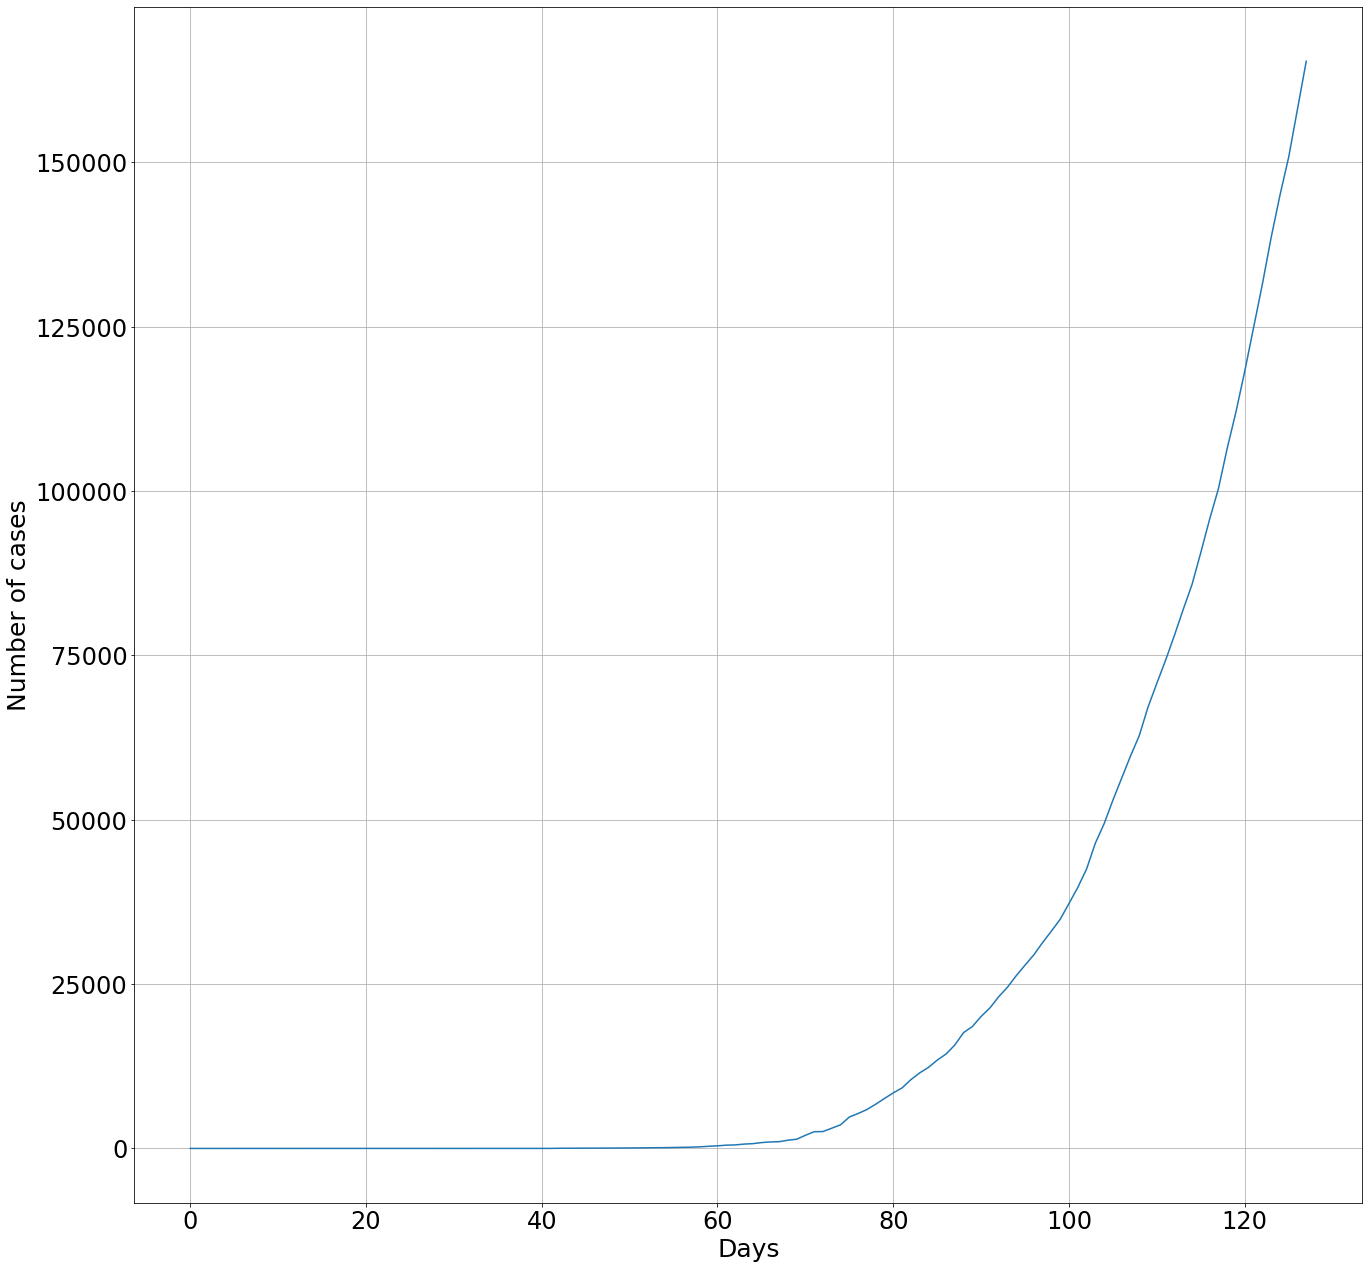

In [49]:
plt.figure(figsize=(22,22))
plt.plot(date,confirmed_c)
plt.xlabel('Days',fontsize=25)
plt.ylabel('Number of cases',fontsize=25)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
fig1=plt.show()


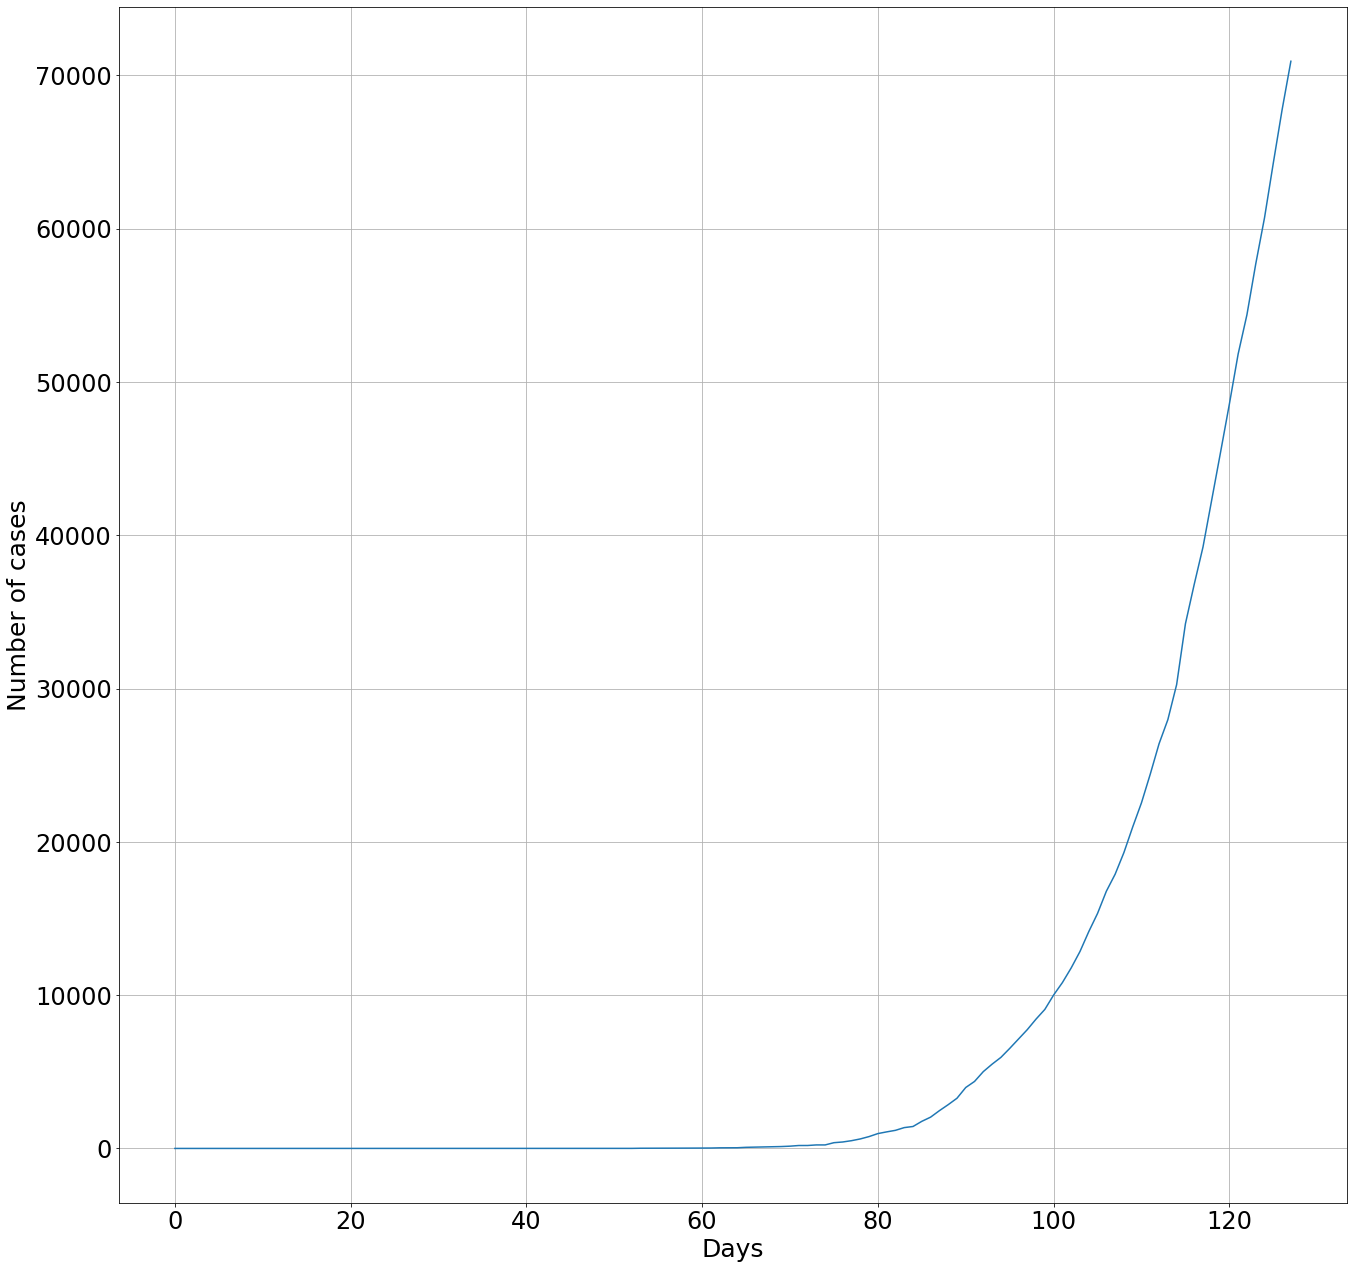

In [50]:
plt.figure(figsize=(22,22))
plt.plot(date,recovered_c)
plt.xlabel('Days',fontsize=25)
plt.ylabel('Number of cases',fontsize=25)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
fig2=plt.show()


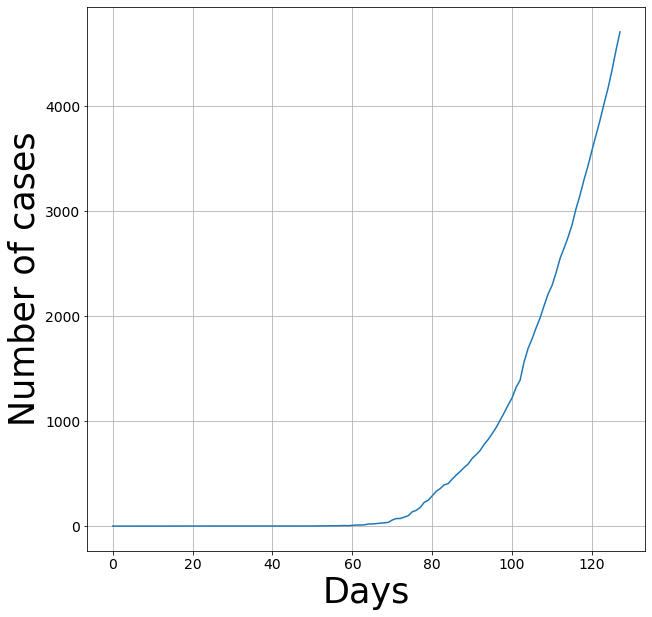

In [51]:
plt.figure(figsize=(10,10))
plt.plot(date,death_c)
plt.xlabel('Days',fontsize=35)
plt.ylabel('Number of cases',fontsize=35)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
fig2=plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

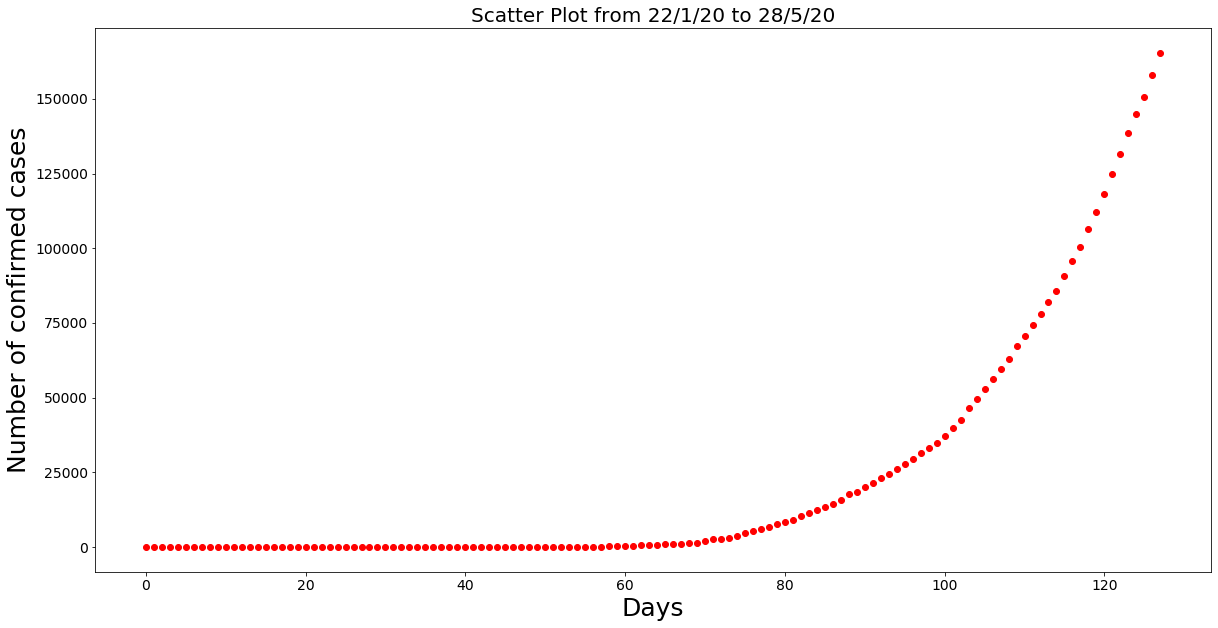

In [52]:
plt.figure(figsize=(20,10))
plt.scatter(date,confirmed_c,color='red')
plt.xlabel('Days',fontsize=25)
plt.ylabel('Number of confirmed cases',fontsize=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Scatter Plot from 22/1/20 to 28/5/20',fontsize=20)
plt.show

In [83]:

from sklearn.model_selection import train_test_split 
X_train_c, X_test_c, y_train_c, y_test_c= train_test_split(date, confirmed_c, test_size=0.2, random_state=0)
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [84]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True, fit_intercept=True)
lin_reg.fit(X_train_c, y_train_c)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

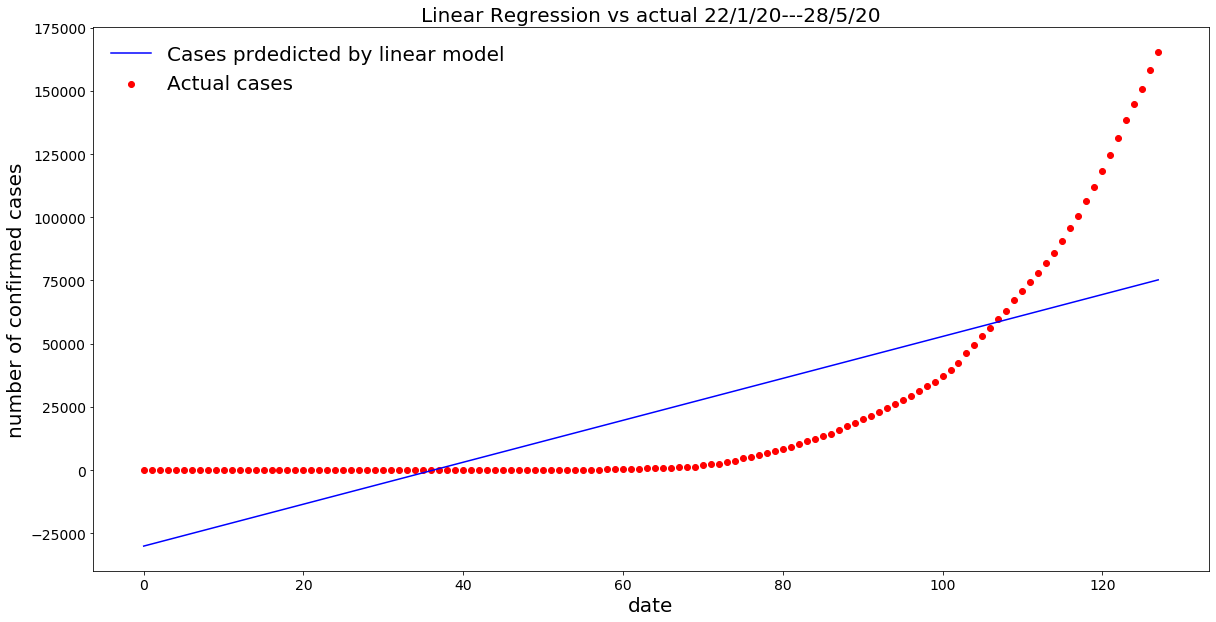

In [85]:
def viz_linear():
    plt.figure(figsize=(20,10))
    plt.scatter(date, confirmed_c, color='red', label='Actual cases')
    plt.plot(date, lin_reg.predict(date), color='blue', label='Cases prdedicted by linear model ')
    plt.title('Linear Regression vs actual 22/1/20---28/5/20',fontsize=20)
    plt.xlabel('date',fontsize=20)
    plt.ylabel('number of confirmed cases',fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='upper left', frameon=False, fontsize=20)
    plt.show()
    return
viz_linear()

In [56]:
#confirmes_cases by linear reg

In [77]:

linear_model=LinearRegression(normalize=True,fit_intercept=True)
linear_model.fit(X_train_c, y_train_c)
test_linear_pred=linear_model.predict(X_test_c)
linear_pred=linear_model.predict(future_forecast)

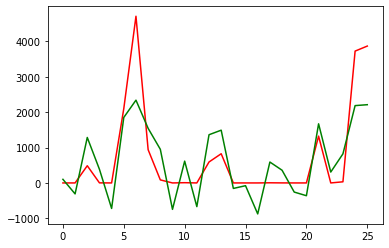

In [78]:
plt.plot(y_test_c,color='red')
plt.plot(test_linear_pred,color='green')

In [82]:
print('Linear regression predictions')
d={}
for i in range (128,192):
    d[start_date_forecast [i]]=linear_pred[i]
d

Linear regression predictions


{'29/05/2020': array([2365.45034068]),
 '30/05/2020': array([2391.17221863]),
 '31/05/2020': array([2416.89409658]),
 '01/06/2020': array([2442.61597453]),
 '02/06/2020': array([2468.33785248]),
 '03/06/2020': array([2494.05973043]),
 '04/06/2020': array([2519.78160838]),
 '05/06/2020': array([2545.50348633]),
 '06/06/2020': array([2571.22536428]),
 '07/06/2020': array([2596.94724223]),
 '08/06/2020': array([2622.66912018]),
 '09/06/2020': array([2648.39099813]),
 '10/06/2020': array([2674.11287608]),
 '11/06/2020': array([2699.83475403]),
 '12/06/2020': array([2725.55663198]),
 '13/06/2020': array([2751.27850993]),
 '14/06/2020': array([2777.00038788]),
 '15/06/2020': array([2802.72226583]),
 '16/06/2020': array([2828.44414378]),
 '17/06/2020': array([2854.16602173]),
 '18/06/2020': array([2879.88789968]),
 '19/06/2020': array([2905.60977763]),
 '20/06/2020': array([2931.33165558]),
 '21/06/2020': array([2957.05353353]),
 '22/06/2020': array([2982.77541148]),
 '23/06/2020': array([300

In [60]:
from sklearn.preprocessing import PolynomialFeatures
X_train_c, X_test_c, y_train_c, y_test_c= train_test_split(date, confirmed_c, test_size=0.2, random_state=0)
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(date)
pol_reg = LinearRegression()
pol_reg.fit(X_poly,confirmed_c)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

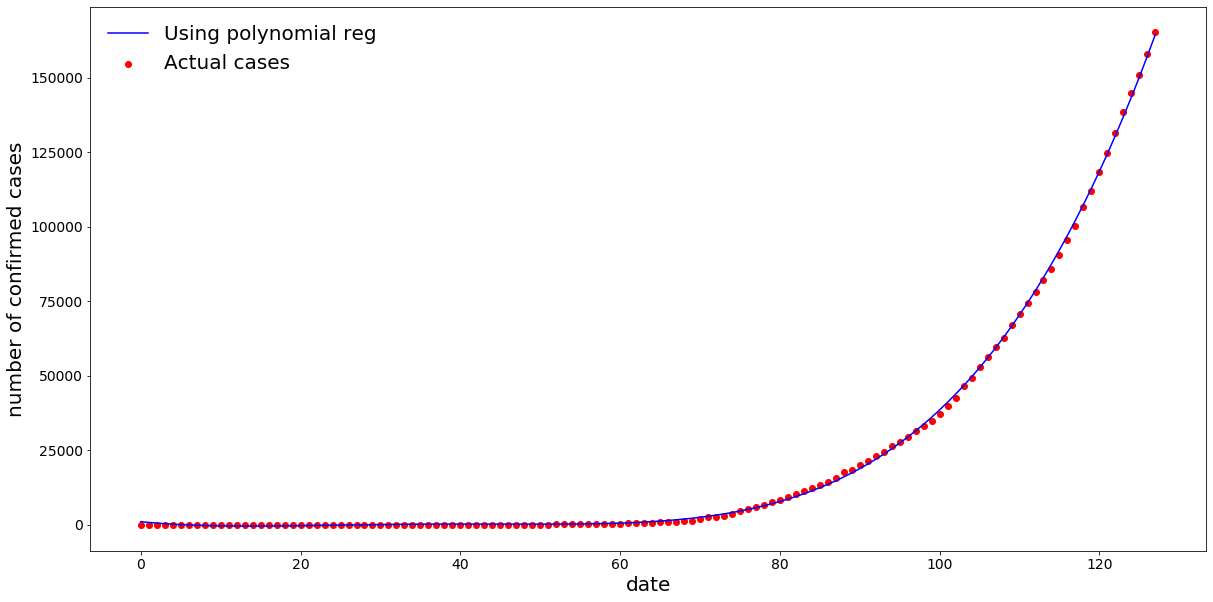

In [61]:
def polymonial():
    plt.figure(figsize=(20,10))
    plt.scatter(date, confirmed_c, color='red',label='Actual cases')
    plt.plot(date, pol_reg.predict(poly_reg.fit_transform(date)), color='blue', label='Using polynomial reg')
    
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.xlabel('date',fontsize=20)
    plt.ylabel('number of confirmed cases',fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='upper left', frameon=False, fontsize=20)
    plt.show()
    return
polymonial()

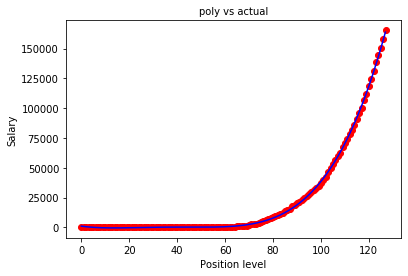

In [62]:
def smooth_polymonial():
    X_grid = np.arange(min(date), max(date), 0.1)
    X_grid = X_grid.reshape(len(X_grid), 1) 
    plt.scatter(date, confirmed_c, color='red')
    plt.plot(X_grid, pol_reg.predict(poly_reg.fit_transform(X_grid)), color='blue')
    plt.title('poly vs actual')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
smooth_polymonial()


In [ ]:
#confirmed cases polynomial regression

In [63]:

X_train_c, X_test_c, y_train_c, y_test_c= train_test_split(date, confirmed_c, test_size=0.2, random_state=0)
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train_c)
pol_reg = LinearRegression()
pol_reg.fit(X_poly,y_train_c)
y_pol_prd=pol_reg.predict(poly_reg.fit_transform(X_test_c))
y_prediction_c =pol_reg.predict(poly_reg.fit_transform(future_forecast))

In [64]:
print(y_prediction_c[-64:])

[[ 171711.29380273]
 [ 179439.9392301 ]
 [ 187424.20869103]
 [ 195669.61296416]
 [ 204181.7208352 ]
 [ 212966.15909695]
 [ 222028.61254929]
 [ 231374.82399919]
 [ 241010.59426069]
 [ 250941.78215492]
 [ 261174.30451008]
 [ 271714.13616146]
 [ 282567.30995144]
 [ 293739.91672947]
 [ 305238.10535208]
 [ 317068.08268289]
 [ 329236.11359259]
 [ 341748.52095897]
 [ 354611.68566689]
 [ 367832.04660829]
 [ 381416.1006822 ]
 [ 395370.40279472]
 [ 409701.56585904]
 [ 424416.26079543]
 [ 439521.21653125]
 [ 455023.22000093]
 [ 470929.11614598]
 [ 487245.807915  ]
 [ 503980.25626366]
 [ 521139.48015474]
 [ 538730.55655807]
 [ 556760.62045058]
 [ 575236.86481627]
 [ 594166.54064623]
 [ 613556.95693862]
 [ 633415.48069871]
 [ 653749.53693882]
 [ 674566.60867837]
 [ 695874.23694385]
 [ 717680.02076884]
 [ 739991.617194  ]
 [ 762816.74126707]
 [ 786163.16604288]
 [ 810038.72258333]
 [ 834451.29995741]
 [ 859408.84524118]
 [ 884919.3635178 ]
 [ 910990.91787749]
 [ 937631.62941757]
 [ 964849.67724244]


In [65]:
print(y_pol_prd[:])

[[ 2.41724634e+02]
 [-1.48095737e+02]
 [ 1.35947011e+04]
 [ 2.00545275e+02]
 [-2.73125800e+02]
 [ 6.28464859e+04]
 [ 1.64232820e+05]
 [ 2.94248813e+04]
 [ 3.66208867e+03]
 [-1.92159196e+02]
 [ 5.59075818e+02]
 [-3.85656821e+02]
 [ 1.74287007e+04]
 [ 2.55177675e+04]
 [ 8.18875180e+01]
 [ 1.64190397e+02]
 [ 5.24068394e+02]
 [ 4.75353058e+02]
 [ 1.97727324e+02]
 [-6.51318551e+01]
 [-2.31794865e+02]
 [ 4.11170509e+04]
 [ 2.01945909e+02]
 [ 1.91968992e+03]
 [ 1.24317525e+05]
 [ 1.30406231e+05]]


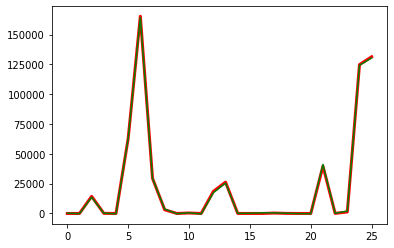

In [66]:
plt.plot(y_test_c,color='red',linewidth=3)
plt.plot(y_pol_prd,color='green')

In [344]:
#recovered cases

In [67]:
X_train_c, X_test_c, y_train_c, y_test_c= train_test_split(date, recovered_c, test_size=0.2, random_state=0)
poly_reg = PolynomialFeatures(degree=6)
X_poly = poly_reg.fit_transform(X_train_c)
pol_reg = LinearRegression()
pol_reg.fit(X_poly,y_train_c)
y_pol_prd=pol_reg.predict(poly_reg.fit_transform(X_test_c))
y_prediction_r =pol_reg.predict(poly_reg.fit_transform(future_forecast))

In [68]:
print(y_prediction_r[-64:])

[[  77529.29002904]
 [  82186.4619779 ]
 [  87058.68939771]
 [  92153.02211426]
 [  97476.64918393]
 [ 103036.89977614]
 [ 108841.2440423 ]
 [ 114897.29397111]
 [ 121212.80423029]
 [ 127795.67299465]
 [ 134653.94276066]
 [ 141795.80114729]
 [ 149229.58168336]
 [ 156963.76458122]
 [ 165006.97749684]
 [ 173367.99627635]
 [ 182055.74568887]
 [ 191079.30014585]
 [ 200447.88440676]
 [ 210170.87427115]
 [ 220257.79725715]
 [ 230718.33326637]
 [ 241562.31523516]
 [ 252799.72977228]
 [ 264440.71778303]
 [ 276495.57507965]
 [ 288974.75297827]
 [ 301888.85888211]
 [ 315248.65685121]
 [ 329065.06815846]
 [ 343349.17183207]
 [ 358112.20518445]
 [ 373365.56432744]
 [ 389120.80467399]
 [ 405389.64142623]
 [ 422183.95004988]
 [ 439515.76673515]
 [ 457397.28884396]
 [ 475840.87534358]
 [ 494859.04722671]
 [ 514464.4879179 ]
 [ 534670.04366638]
 [ 555488.72392534]
 [ 576933.70171752]
 [ 599018.31398727]
 [ 621756.06193898]
 [ 645160.6113619 ]
 [ 669245.7929414 ]
 [ 694025.60255655]
 [ 719514.20156418]


In [347]:
#death

In [69]:
X_train_c, X_test_c, y_train_c, y_test_c= train_test_split(date, death_c, test_size=0.2, random_state=0)
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X_train_c)
pol_reg = LinearRegression()
pol_reg.fit(X_poly,y_train_c)
y_pol_prd=pol_reg.predict(poly_reg.fit_transform(X_test_c))
y_prediction_d =pol_reg.predict(poly_reg.fit_transform(future_forecast))

In [70]:
print(y_prediction_d[-64:])

[[ 4886.31282048]
 [ 5065.60675383]
 [ 5248.34874803]
 [ 5434.50314213]
 [ 5624.03043371]
 [ 5816.8872082 ]
 [ 6013.02606813]
 [ 6212.39556236]
 [ 6414.94011539]
 [ 6620.59995661]
 [ 6829.31104956]
 [ 7041.0050212 ]
 [ 7255.60909118]
 [ 7473.04600109]
 [ 7693.23394373]
 [ 7916.08649241]
 [ 8141.51253015]
 [ 8369.416179  ]
 [ 8599.69672929]
 [ 8832.24856886]
 [ 9066.96111241]
 [ 9303.71873065]
 [ 9542.40067968]
 [ 9782.88103017]
 [10025.02859668]
 [10268.70686687]
 [10513.77393084]
 [10760.08241032]
 [11007.47938799]
 [11255.8063367 ]
 [11504.89904878]
 [11754.58756529]
 [12004.69610525]
 [12255.04299496]
 [12505.44059723]
 [12755.69524066]
 [13005.60714889]
 [13254.9703699 ]
 [13503.57270523]
 [13751.19563927]
 [13997.61426851]
 [14242.59723086]
 [14485.90663481]
 [14727.29798882]
 [14966.52013047]
 [15203.31515581]
 [15437.41834858]
 [15668.5581095 ]
 [15896.45588551]
 [16120.82609905]
 [16341.37607734]
 [16557.80598162]
 [16769.80873641]
 [16977.06995882]
 [17179.26788775]
 [17376.07

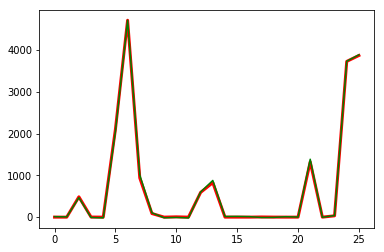

In [356]:
plt.plot(y_test_c,color='red',linewidth=3)
plt.plot(y_pol_prd,color='green')

In [357]:
list_of_tuples = list(zip(current_forecast,confirmed_c, recovered_c,death_c)) 

cov_given=pd.DataFrame(list_of_tuples,columns=['Date','Total Confirmed','Total recovered','Total deaths'])

In [358]:
cov_given.tail(15)

,Date,Total Confirmed,Total recovered,Total deaths
113,14/05/2020,[81997],[27969],[2649]
114,15/05/2020,[85784],[30258],[2753]
115,16/05/2020,[90648],[34224],[2871]
116,17/05/2020,[95698],[36795],[3025]
117,18/05/2020,[100328],[39233],[3156]
118,19/05/2020,[106475],[42309],[3302]
119,20/05/2020,[112028],[45422],[3434]
120,21/05/2020,[118226],[48553],[3584]
121,22/05/2020,[124794],[51824],[3726]
122,23/05/2020,[131423],[54385],[3868]


In [359]:
list_of_tuples = list(zip(start_date_forecast[-64:],y_prediction_c[-64:], y_prediction_r[-64:],y_prediction_d[-64:])) 

cov_pred=pd.DataFrame(list_of_tuples,columns=['Date','Total Confirmed','Total recovered','Total deaths'])

In [360]:
cov_pred.tail(15)

,Date,Total Confirmed,Total recovered,Total deaths
49,17/07/2020,[964849.6772354203],[719513.5701533059],[16120.826242153307]
50,18/07/2020,[992653.2984563836],[745725.2635136254],[16341.376224667845]
51,19/07/2020,[1021050.7881921653],[772674.5658507277],[16557.806133262602]
52,20/07/2020,[1050050.4995684053],[800376.1365085174],[16769.8088924728]
53,21/07/2020,[1079660.843717827],[828844.8013084775],[16977.07011939359]
54,22/07/2020,[1109890.289780233],[858095.5527656863],[17179.26805294556]
55,23/07/2020,[1140747.3649025094],[888143.5502912176],[17376.073483139793]
56,24/07/2020,[1172240.654238623],[919004.1203809532],[17567.149680343085]
57,25/07/2020,[1204378.8009496243],[950692.7567907847],[17752.152324543502]
58,26/07/2020,[1237170.5062036426],[983225.1206982139],[17930.729434615256]


In [361]:
start_date_forecast[-64:]

['29/05/2020',
 '30/05/2020',
 '31/05/2020',
 '01/06/2020',
 '02/06/2020',
 '03/06/2020',
 '04/06/2020',
 '05/06/2020',
 '06/06/2020',
 '07/06/2020',
 '08/06/2020',
 '09/06/2020',
 '10/06/2020',
 '11/06/2020',
 '12/06/2020',
 '13/06/2020',
 '14/06/2020',
 '15/06/2020',
 '16/06/2020',
 '17/06/2020',
 '18/06/2020',
 '19/06/2020',
 '20/06/2020',
 '21/06/2020',
 '22/06/2020',
 '23/06/2020',
 '24/06/2020',
 '25/06/2020',
 '26/06/2020',
 '27/06/2020',
 '28/06/2020',
 '29/06/2020',
 '30/06/2020',
 '01/07/2020',
 '02/07/2020',
 '03/07/2020',
 '04/07/2020',
 '05/07/2020',
 '06/07/2020',
 '07/07/2020',
 '08/07/2020',
 '09/07/2020',
 '10/07/2020',
 '11/07/2020',
 '12/07/2020',
 '13/07/2020',
 '14/07/2020',
 '15/07/2020',
 '16/07/2020',
 '17/07/2020',
 '18/07/2020',
 '19/07/2020',
 '20/07/2020',
 '21/07/2020',
 '22/07/2020',
 '23/07/2020',
 '24/07/2020',
 '25/07/2020',
 '26/07/2020',
 '27/07/2020',
 '28/07/2020',
 '29/07/2020',
 '30/07/2020',
 '31/07/2020']

In [362]:
covid19=pd.DataFrame()

In [363]:
covid19=pd.concat([cov_given,cov_pred],axis=0)

In [364]:
covid19.shape

(192, 4)

In [365]:
recovery_rate=y_prediction_r[-1]/(y_prediction_c[-1]+y_prediction_d[-1])
print(recovery_rate)

[0.81058664]


In [366]:
death_rate=y_prediction_d[-1]/(y_prediction_c[-1]+y_prediction_d[-1])
print(death_rate)

[0.01308738]
